<img src="logoucm.png" style="height: 250px">
<center style="color:#888"><br/></center>




<font size="6"><center>***Metodos numéricos en finanzas***</center></font>

<font size="5"><center><span style="color:blue">***Nombre y Apellidos: Andrés Velasco Sánchez***</span></center></font>

## Importamos las librerías necesarias

In [58]:
import numpy as np
import pandas as pd
from math import sin, cos, sqrt, log, exp, pi
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import t
import scipy.stats as si

In [59]:
m=2**(31)-1
a=16807
b=0

In [60]:

def generador_congruencial(semilla, m, a, b):
    x = semilla
    inv_m = 1 / m
    while True:
        x = (a * x + b) % m
        yield x * inv_m
def box_muller(N,ant=False):
    g_2 = generador_congruencial(123456789, m, a, b)
    n = N * 2
    U = [1 - next(g_2) if ant else next(g_2) for _ in range(n)]
    u1 = np.array(U[0::2])
    u2 = np.array(U[1::2])

    z0 = np.sqrt(-2.0 * np.log(u1)) * np.cos(2.0 * np.pi * u2)
    z1 = np.sqrt(-2.0 * np.log(u1)) * np.sin(2.0 * np.pi * u2)
    return z0, z1


def marsaglia_method(N,ant=False):
    g_3 = generador_congruencial(123456789, m, a, b)
    X = []
    Y = []
    n = 0
    while n<N:
        U_1 = 1-next(g_3) if ant else next(g_3)
        U_2 = 1-next(g_3) if ant else next(g_3)
        v_1 = 2 * U_1 - 1
        v_2 = 2 * U_2 - 1
        R_2 = v_1**2 + v_2**2
        if R_2 >= 1:
            continue

        y = np.sqrt(-2 * np.log(R_2) / R_2)
        X.append(v_1 * y)
        Y.append(v_2 * y)
        n += 1

    return np.array(X), np.array(Y)

def brownian_motion(T, N,X,Y):
    dt = T / N
    X = [0]+X.tolist()
    Y = [0]+Y.tolist()
    X = np.cumsum(np.sqrt(dt) * np.array(X))
    Y = np.cumsum(np.sqrt(dt) * np.array(Y))
    return X, Y

import matplotlib.pyplot as plt
import seaborn as sns

def plot_variacion(df, eje_x, valores_eje, parametros_fijos, lineas_parametros, titulo_suptitle):

    
    fig, axes = plt.subplots(1, len(lineas_parametros), figsize=(6*len(lineas_parametros),5), sharey=True)
    if len(lineas_parametros) == 1:
        axes = [axes]
    
    palette = sns.color_palette("Set1", n_colors=3)
    
    for ax_idx, (param_name, valores_linea) in enumerate(lineas_parametros.items()):
        for i, val_linea in enumerate(valores_linea):
            color = palette[i % 3]
            V_call_vals = []
            V_put_vals = []
            
            for val_eje in valores_eje:
                # Construir tuplas para xs
                niveles = []
                for nivel in ['k','r','σ','T']:
                    if nivel == eje_x:
                        niveles.append(val_eje)
                    elif nivel == param_name:
                        niveles.append(val_linea)
                    else:
                        niveles.append(parametros_fijos.get(nivel, df.index.get_level_values(nivel)[0]))
                
                df_subset = df.xs(tuple(niveles), level=('k','r','σ','T'))
                V_call_vals.append(df_subset['V_call'].values[0])
                V_put_vals.append(df_subset['V_put'].values[0])
            
            ax = axes[ax_idx]
            ax.plot(valores_eje, V_call_vals, marker='o', color=color, label=f'Call {param_name}={val_linea}')
            ax.plot(valores_eje, V_put_vals, marker='s', linestyle='--', color=color, label=f'Put {param_name}={val_linea}')
            
        ax.set_xlabel(eje_x)
        ax.set_title(f"Variación con {param_name}")
        ax.grid(True)
        ax.legend(fontsize=8)
    
    axes[0].set_ylabel("Valor de la opción")
    plt.suptitle(titulo_suptitle, fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
def calcular_estadisticas_montecarlo(valores):
    n_muestras = len(valores)
    media = np.mean(valores)
    varianza = np.var(valores, ddof=1)
    desviacion_std = np.std(valores, ddof=1)
    t_critico = t.ppf(0.975, df=n_muestras - 1)

    precision = t_critico * (desviacion_std / sqrt(n_muestras))

    return media, varianza, precision

def imprimir_tabla_estadisticas(df):
    print("\n" + "="*75)
    print("      RESULTADOS MONTE CARLO - OPCION CALL ASIATICA")
    print("="*75)
    print(f"{'Opción':<10} | {'Valor estimado':>15} | {'Varianza':>15} | {'Precisión (95%)':>18}")
    print("-"*75)

    for _, row in df.iterrows():
        print(f"{row['Opción']:<10} | "
              f"{row['Valor estimado']:>15.6f} | "
              f"{row['Varianza']:>15.6f} | "
              f"{row['Precisión (95%)']:>18.6f}")

    print("="*75 + "\n")

In [61]:
r = 0.03
r_c = log(1+r)
K = 14
T = 1
sigma = 0.3
S0 = 14
d_c = 0
d=0
N = 1000   


In [62]:
def black_scholes(S0, K, T, r_c, sigma, d_c):
    d1 = (np.log(S0/K) + (r_c - d_c + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    V_call = S0*si.norm.cdf(d1)-K*np.exp(-r_c*T)*si.norm.cdf(d2)
    V_put = K*np.exp(-r_c*T)*si.norm.cdf(-d2)-S0*si.norm.cdf(-d1)
    return V_call, V_put


<font size="6"><center><span style="color:blue">***Práctica 6***</span></center></font>

- **(a.)** Obtener mediante el método binomial el valor de una opción call europea y una opción put europea con los datos de la práctica 2 y comparar el resultado de la estimación con la obtenida en tal práctica. Usar $n = 100$ $(\delta t = 1/100)$

Problemas computacionales

In [ ]:
n=100
delta_t = 1/n

def probabilidad_binomial(N, p, u, ant=False):
    g__binomial = generador_congruencial(123456789, m, a, b)
    U = np.array([1 - next(g__binomial) if ant else next(g__binomial)
                  for _ in range(N)])
    movimientos = np.where(U < p, u, 1/u)
    
    return movimientos

u = exp(sigma*sqrt(delta_t))

p = (exp(r*delta_t)-1/u)/(u-1/u)

B = probabilidad_binomial(1000*12,p,u)

B = B.reshape(1000,12)

ST= S0*np.prod(B, axis=1)


V_call = np.exp(-r_c*T) * np.maximum(ST - K, 0)
print(V_call.mean())




Call: 1.8555, Put: 1.4418


- **(b.)** Representa gráficamente el valor de la opción call obtenido mediante el método binomial respecto de diferentes valores de $n$ (por ejemplo desde n=20 hasta n=100) y muestra como referencia el valor obtenido mediante la fórmula de Black-Scholes como una constante. ¿Qué sucede?

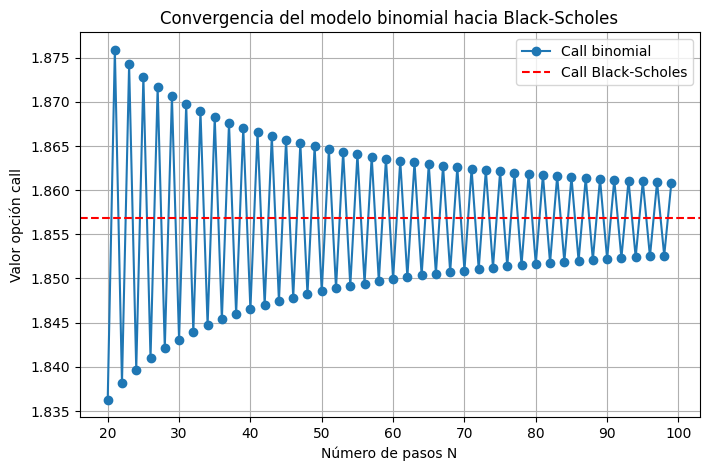

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- Datos de la práctica ---
S0 = 14
K = 14
T = 1
r = 0.03
r_c = np.log(1 + r)
sigma = 0.3

# --- Función modelo binomial ---
def binomial_call(S0, K, T, r_c, sigma, N):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r_c*dt) - d) / (u - d)
    

    ST = np.zeros(N+1)
    for j in range(N+1):
        ST[j] = S0 * (u**(N-j)) * (d**j)
    

    C = np.maximum(ST - K, 0)

    for i in range(N-1, -1, -1):
        for j in range(i+1):
            C[j] = np.exp(-r_c*dt) * (p*C[j] + (1-p)*C[j+1])
    return C[0]

def black_scholes(S0, K, T, r_c, sigma, d_c):
    d1 = (np.log(S0/K) + (r_c - d_c + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    V_call = S0*si.norm.cdf(d1)-K*np.exp(-r_c*T)*si.norm.cdf(d2)
    V_put = K*np.exp(-r_c*T)*si.norm.cdf(-d2)-S0*si.norm.cdf(-d1)
    return V_call, V_put

# --- Evaluar diferentes N ---
N_values = np.arange(20, 100, 1)


call_binomial = [binomial_call(S0, K, T, r_c, sigma, N) for N in N_values]

# Valor Black-Scholes
call_bs,_ = black_scholes(S0, K, T, r_c, sigma, d_c)

# --- Gráfico ---
plt.figure(figsize=(8,5))
plt.plot(N_values, call_binomial, marker='o', label='Call binomial')
plt.axhline(y=call_bs, color='red', linestyle='--', label='Call Black-Scholes')
plt.xlabel('Número de pasos N')
plt.ylabel('Valor opción call')
plt.title('Convergencia del modelo binomial hacia Black-Scholes')
plt.legend()
plt.grid(True)
plt.show()






- **(c.)** Para qué valor de n la diferencia entre el resultado obtenido mediante la fórmula de Black-Scholes y el obtenido mediante el método binomial difieren menos de $10^-5$ y para qué valor de n, la diferencia en el valor de la prima por el método binomial es menor de $10^-5$ entre iteraciones.

Había empezado directamente a hacer simulaciones para llegar a dicho n que permitise un error menor de $10^{-5}$, con un bucle *for*. Después de probar que con mis recursos no era posible conseguir dicha n, se me había ocurrido crear políticas de prueba donde los saltos de $n$ eran más grandes


In [125]:
import numpy as np
from scipy.stats import linregress


n = np.arange(10,900,10)
E = (np.array([binomial_call(S0, K, T, r_c, sigma, N) for N in n]) - call_bs) * (-1)
print(E)
ln_n = np.log(n)
ln_E = np.log(E)


slope, intercept, r_value, p_value, std_err = linregress(ln_n, ln_E)

p = -slope
C = np.exp(intercept)

print(f"p = {p:.4f}, C = {C:.4e}")


[0.04073551 0.02051995 0.01371158 0.01029521 0.00824162 0.00687102
 0.00589127 0.00515605 0.00458398 0.00412617 0.0037515  0.00343921
 0.00317491 0.00294834 0.00275195 0.00258009 0.00242843 0.00229361
 0.00217298 0.0020644  0.00196615 0.00187683 0.00179528 0.00172051
 0.00165173 0.00158823 0.00152943 0.00147484 0.001424   0.00137656
 0.00133217 0.00129055 0.00125146 0.00121467 0.00117998 0.00114721
 0.00111621 0.00108685 0.00105899 0.00103252 0.00100735 0.00098337
 0.00096051 0.00093869 0.00091783 0.00089788 0.00087879 0.00086048
 0.00084293 0.00082607 0.00080988 0.00079431 0.00077932 0.0007649
 0.00075099 0.00073758 0.00072465 0.00071216 0.00070009 0.00068842
 0.00067714 0.00066622 0.00065565 0.0006454  0.00063548 0.00062585
 0.00061651 0.00060745 0.00059864 0.00059009 0.00058178 0.0005737
 0.00056585 0.0005582  0.00055076 0.00054351 0.00053646 0.00052958
 0.00052288 0.00051634 0.00050997 0.00050375 0.00049768 0.00049176
 0.00048597 0.00048032 0.0004748  0.00046941 0.00046414]
p = 0.9

In [126]:
import numpy as np
from scipy.stats import linregress

# n = pasos, E = errores absolutos
ln_n = np.log(n)
ln_E = np.log(np.abs(E))  # tomar abs por si hay signo negativo

slope, intercept, r_value, p_value, std_err = linregress(ln_n, ln_E)
p = -slope          # Esto te da el exponente real
C = np.exp(intercept)

print(f"Exponente p = {p:.4f}, C = {C:.4e}")


Exponente p = 0.9986, C = 4.0944e-01


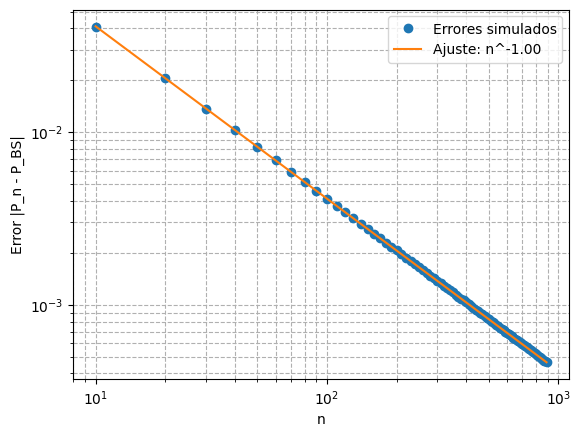

In [127]:
import matplotlib.pyplot as plt

plt.loglog(n, np.abs(E), 'o', label='Errores simulados')
plt.loglog(n, C*n**(-p), '-', label=f'Ajuste: n^-{p:.2f}')
plt.xlabel('n')
plt.ylabel('Error |P_n - P_BS|')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.show()


In [107]:
error_objetivo = 1e-5

n_necesario = (C / error_objetivo)**(1/p)
print(f"Se necesitan n ≈ {int(np.ceil(n_necesario))} pasos para E < {error_objetivo}")



Se necesitan n ≈ 41722 pasos para E < 1e-05


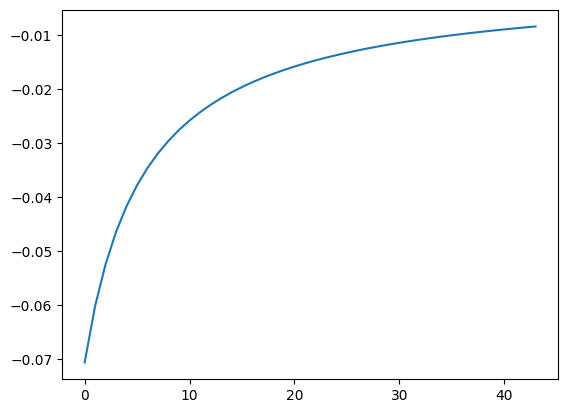

In [119]:
n = np.arange(10,100,1)
E = np.array([binomial_call(S0, K, T, r_c, sigma, N) for N in n]) 
plt.plot(np.diff(E)[1::2])

In [128]:
n = np.arange(10,500,1)
E = np.diff(np.array([binomial_call(S0, K, T, r_c, sigma, N) for N in n]))

E = E[1::2] * (-1)
n = n[1::2][1:]

ln_n = np.log(n)
ln_E = np.log(E)


slope, intercept, r_value, p_value, std_err = linregress(ln_n, ln_E)

p = -slope
C = np.exp(intercept)

print(f"p = {p:.4f}, C = {C:.4e}")

p = 1.0174, C = 9.0134e-01


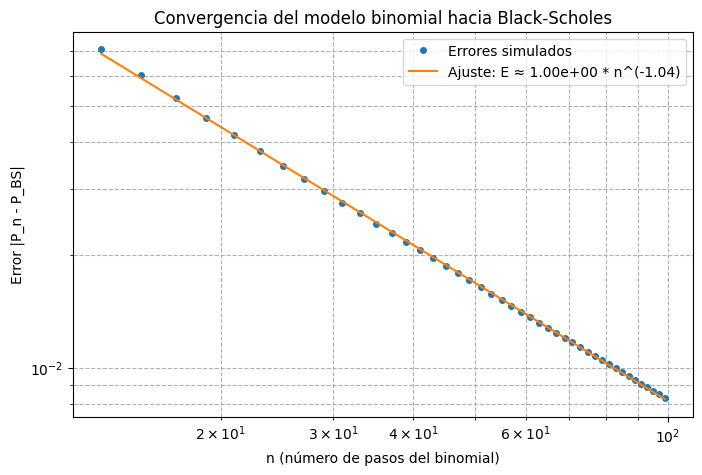

In [121]:
# Graficar errores y ajuste
plt.figure(figsize=(8,5))
plt.loglog(n, E, 'o', label='Errores simulados', markersize=4)
plt.loglog(n, C*n**(-p), '-', label=f'Ajuste: E ≈ {C:.2e} * n^(-{p:.2f})')
plt.xlabel('n (número de pasos del binomial)')
plt.ylabel('Error |P_n - P_BS|')
plt.title('Convergencia del modelo binomial hacia Black-Scholes')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

In [122]:
error_objetivo = 1e-5

n_necesario = (C / error_objetivo)**(1/p)
print(f"Se necesitan n ≈ {int(np.ceil(n_necesario))} pasos para E < {error_objetivo}")

Se necesitan n ≈ 61616 pasos para E < 1e-05
